In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

import datetime

In [2]:
df = pd.read_csv('spotify.csv', index_col=0)

In [3]:
df.head(15)

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520000000000001kg,0.496mol/L,0.682,2.94e-05,8.0,0.0589,-4.095,1,0.0294,167.06,4,0.474
1,In The End,66,216933,0.0103kg,0.542mol/L,0.853,0.0,3.0,0.108,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.00817kg,0.737mol/L,0.463,0.447,0.0,0.255,-7.8279999999999985,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.0264kg,0.451mol/L,0.97,0.00355,0.0,0.102,-4.938,1,0.107,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954kg,0.447mol/L,0.7659999999999999,0.0,10.0,0.113,-5.065,1,0.0313,172.011,4,0.574
5,Bring Me To Life,80,235893,0.00895kg,0.316mol/L,0.945,1.85e-06,4.0,0.396,-3.169,0,0.124,189.931,4,0.320
6,Last Resort,81,199893,0.000504kg,0.581mol/L,0.887,0.00111,4.0,0.268,-3.659,0,0.0624,90.578,4,0.724
7,Are You Gonna Be My Girl,76,213800,0.00148kg,0.613mol/L,0.953,0.000582,2.0,0.152,-3.435,1,0.0855,105.046,4,0.537
8,Mr. Brightside,80,222586,0.00108kg,0.33mol/L,0.936,0.0,1.0,0.0926,-3.66,1,0.0917,148.112,4,0.234
9,Sex on Fire,81,203346,0.00172kg,0.542mol/L,0.905,0.0104,9.0,0.136,-5.653,1,0.054000000000000006,153.398,4,0.374


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18835 entries, 0 to 18834
Data columns (total 15 columns):
song_name           18835 non-null object
song_popularity     18835 non-null object
song_duration_ms    18835 non-null object
acousticness        18835 non-null object
danceability        18835 non-null object
energy              18835 non-null object
instrumentalness    18835 non-null object
key                 18835 non-null float64
liveness            18835 non-null object
loudness            18835 non-null object
audio_mode          18835 non-null object
speechiness         18835 non-null object
tempo               18835 non-null object
time_signature      18835 non-null object
audio_valence       18834 non-null float64
dtypes: float64(2), object(13)
memory usage: 2.3+ MB


In [5]:
def isInt(s):
    try: 
        np.int(s)
        return True
    except ValueError:
        return False

In [6]:
def isFloat(s):
    try: 
        float(s)
        return True
    except ValueError:
        return False

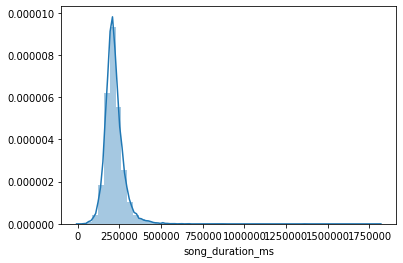

In [7]:
df['song_duration_ms'] = df['song_duration_ms'].apply(lambda a: np.int(a) if isInt(a) and int(a) > 0 else np.NaN)
sns.distplot(df['song_duration_ms'].dropna())

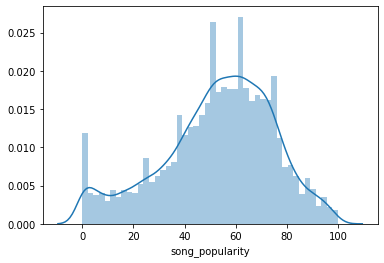

In [8]:
df['song_popularity'] = df['song_popularity'].apply(lambda a: np.int(a) if isInt(a) else np.NaN)
sns.distplot(df['song_popularity'].dropna())

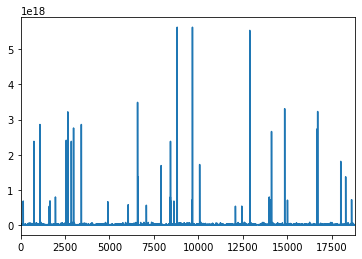

In [9]:
df['acousticness'] = df['acousticness'].replace(r'[\D\.]', '', regex=True)
df['acousticness'] = df['acousticness'].astype(float)
df['acousticness'].plot()

In [10]:
df['danceability'] = df['danceability'].replace(r'[\D\.]', '', regex=True)
df['danceability'] = df['danceability'].astype(float)

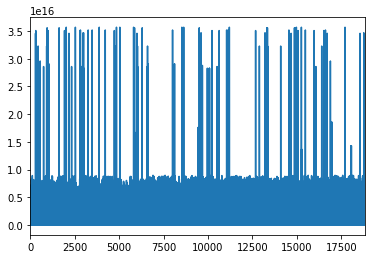

In [11]:
df['danceability'].plot()

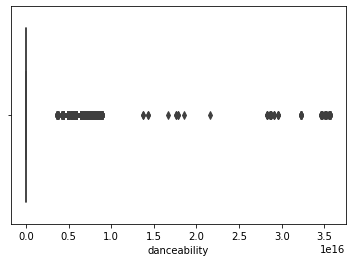

In [12]:
sns.boxplot(df['danceability'].dropna())

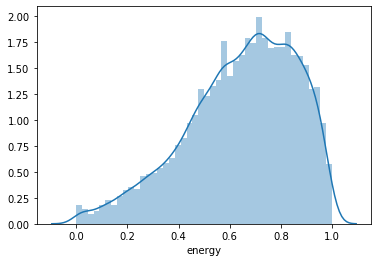

In [13]:
df['energy'] = df['energy'].apply(lambda a: np.float(a) if isFloat(a) else np.NaN)
sns.distplot(df['energy'].dropna())

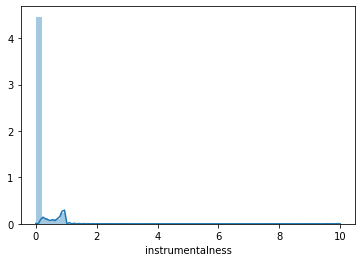

In [14]:
df['instrumentalness'] = df['instrumentalness'].apply(lambda a: np.float(a) if isFloat(a) else np.NaN)
sns.distplot(df['instrumentalness'].dropna())

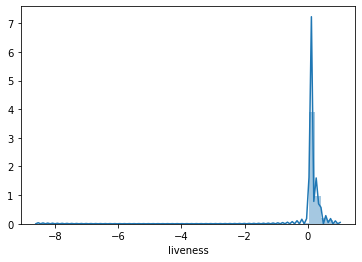

In [15]:
df['liveness'] = df['liveness'].apply(lambda a: np.float(a) if isFloat(a) else np.NaN)
sns.distplot(df['liveness'].dropna())

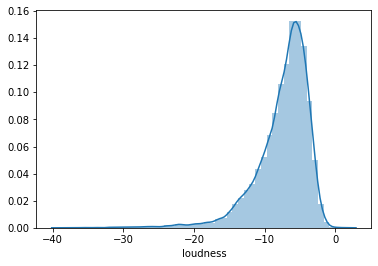

In [16]:
df['loudness'] = df['loudness'].apply(lambda a: np.float(a) if isFloat(a) else np.NaN)
sns.distplot(df['loudness'].dropna())

In [17]:
df.groupby('audio_mode')['key'].count()

audio_mode
0           7003
0.105          1
1          11830
nao_sei        1
Name: key, dtype: int64

In [18]:
df['audio_mode'] = df['audio_mode'].apply(lambda a: np.int(a) if a == '1' or a == '0' or a == 1 or a == 0 else np.NaN)
df.groupby('audio_mode')['key'].count()

audio_mode
0.0     7003
1.0    11830
Name: key, dtype: int64

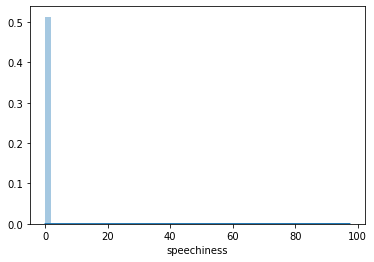

In [19]:
df['speechiness'] = df['speechiness'].dropna().apply(lambda a: np.float(a) if isFloat(a) else np.NaN)
sns.distplot(df['speechiness'].dropna())

In [20]:
df.groupby('speechiness')['key'].count() # achei vc desgraçado

speechiness
0.0000     2
0.0224     1
0.0228     4
0.0229     1
0.0231     3
          ..
0.9150     1
0.9360     1
0.9400     1
0.9410     1
97.4200    1
Name: key, Length: 1225, dtype: int64

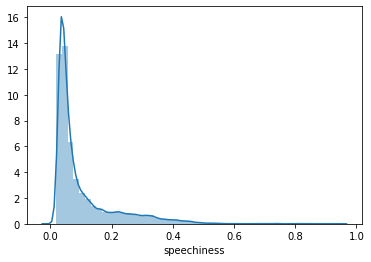

In [21]:
df['speechiness'] = df['speechiness'].apply(lambda a: np.float(a) if isFloat(a) and float(a) <= 1 else np.NaN)
sns.distplot(df['speechiness'].dropna())

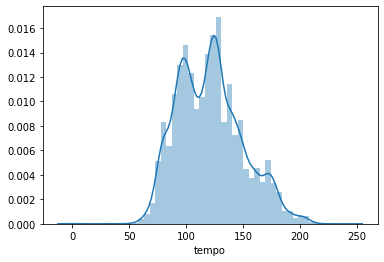

In [22]:
df['tempo'] = df['tempo'].apply(lambda a: np.float(a) if isFloat(a) else np.NaN)
sns.distplot(df['tempo'].dropna())

In [23]:
df.groupby('time_signature')['key'].count()

time_signature
0                 3
0.7               1
1                73
2800000000        1
3               772
4             17751
5               233
nao_sei           1
Name: key, dtype: int64

In [24]:
df['time_signature'] = df['time_signature'].apply(lambda a: np.int(a) if isInt(a) and int(a) <= 5 else np.NaN)
df.groupby('time_signature')['key'].count()

time_signature
0.0        3
1.0       73
3.0      772
4.0    17751
5.0      233
Name: key, dtype: int64

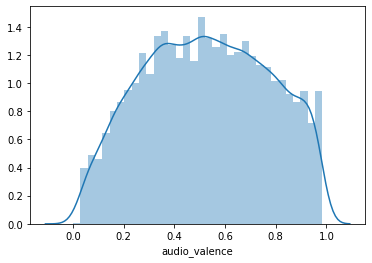

In [25]:
df['audio_valence'].apply(lambda a: np.float(a) if isFloat(a) else np.NaN)
sns.distplot(df['audio_valence'].dropna())

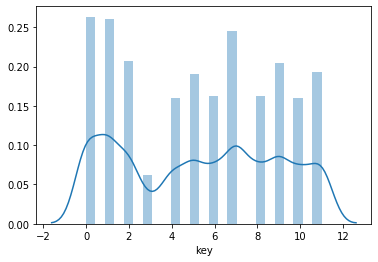

In [26]:
sns.distplot(df['key'].dropna()) # q azank bonzinho

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18835 entries, 0 to 18834
Data columns (total 15 columns):
song_name           18835 non-null object
song_popularity     18834 non-null float64
song_duration_ms    18833 non-null float64
acousticness        18835 non-null float64
danceability        18835 non-null float64
energy              18834 non-null float64
instrumentalness    18833 non-null float64
key                 18835 non-null float64
liveness            18831 non-null float64
loudness            18834 non-null float64
audio_mode          18833 non-null float64
speechiness         18833 non-null float64
tempo               18834 non-null float64
time_signature      18832 non-null float64
audio_valence       18834 non-null float64
dtypes: float64(14), object(1)
memory usage: 2.3+ MB


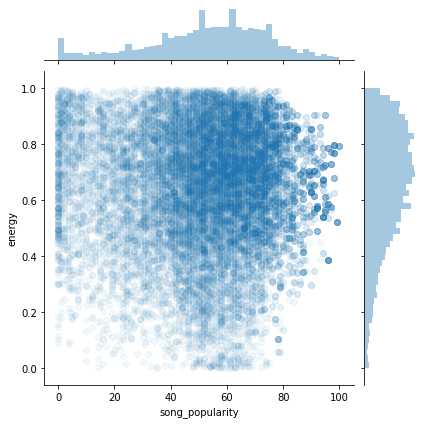

In [28]:
# tentando achar alguma correlação entre a popularidade e energia, nada muito claro
sns.jointplot(df['song_popularity'], df['energy'], alpha=0.05)

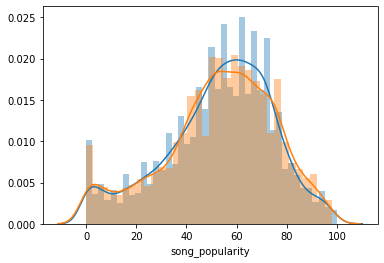

In [29]:
sns.distplot(df[df['audio_mode'] == 1]['song_popularity'].dropna())
sns.distplot(df[df['audio_mode'] == 0]['song_popularity'].dropna())

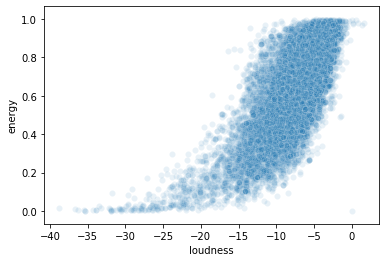

In [30]:
sns.scatterplot(df['loudness'], df['energy'], alpha=0.1) #musicas maisaltas são mais energeticas

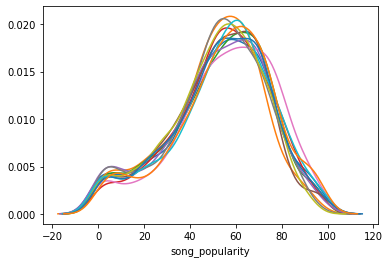

In [35]:
# sns.lineplot(df['audio_valence'],df['song_popularity'], hue = df['key'])
for key in df['key'].unique():
    sns.distplot(df[df['key'] == key]['song_popularity'].dropna(), hist=False)

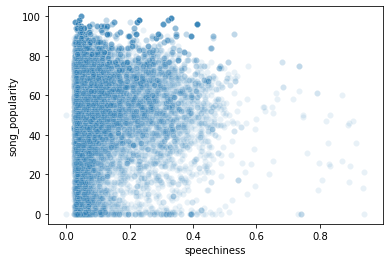

In [37]:
sns.scatterplot(df['speechiness'], df['song_popularity'], alpha=0.1)

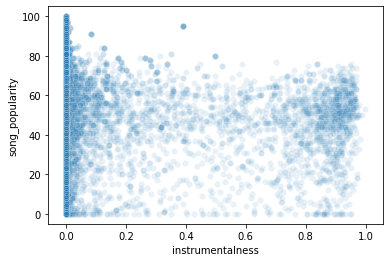

In [38]:
sns.scatterplot(df['instrumentalness'], df['song_popularity'], alpha=0.1)